In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('../AirPassengers.csv')

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

In [11]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [13]:
data.set_index('Month')

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [14]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [15]:
data.set_index('Month', inplace=True )

In [16]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: xlabel='Month'>

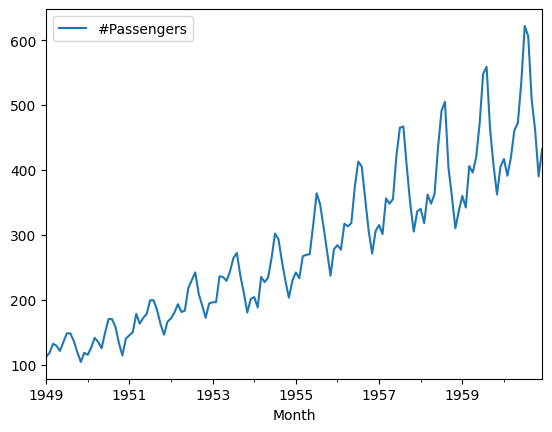

In [18]:
data.plot()

In [30]:
data_mean = data.rolling(window=12).mean()
data_std = data.rolling(window=12).std()


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

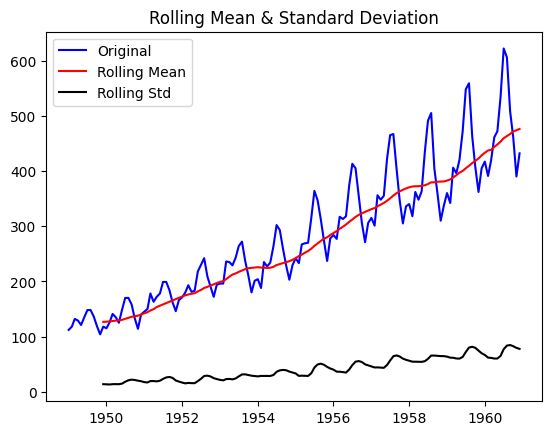

In [31]:
plt.plot(data, color='blue', label='Original')
plt.plot(data_mean, color='red', label='Rolling Mean')
plt.plot(data_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')


In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
result = adfuller(data['#Passengers'])

In [34]:
result

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [35]:
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: 0.8153688792060482
n_lags: 13
p-value: 0.991880243437641
Critial Values:
   1%, -3.4816817173418295
Critial Values:
   5%, -2.8840418343195267
Critial Values:
   10%, -2.578770059171598


In [37]:
# data in non stationary 
import numpy as np 

In [38]:
first_log = np.log(data)

In [39]:
first_log = first_log.dropna()

<Axes: xlabel='Month'>

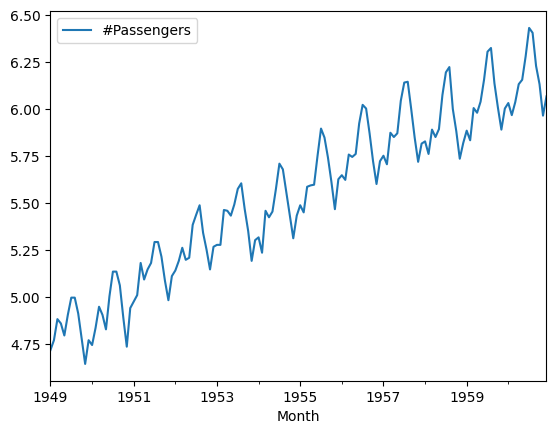

In [40]:
first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation of first log ')

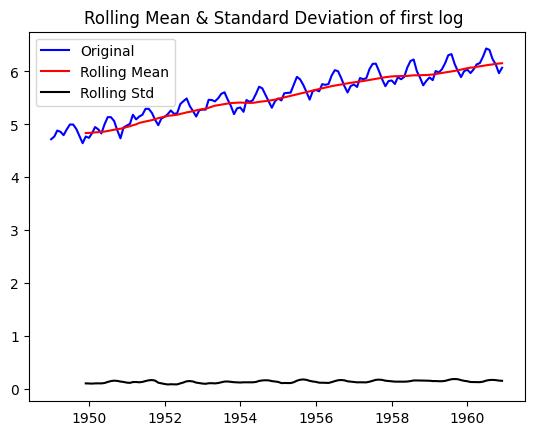

In [42]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()
plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation of first log ')

In [43]:
new_data = first_log - mean_log

In [44]:
new_data = new_data.dropna()

In [45]:
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation of transformed data ')

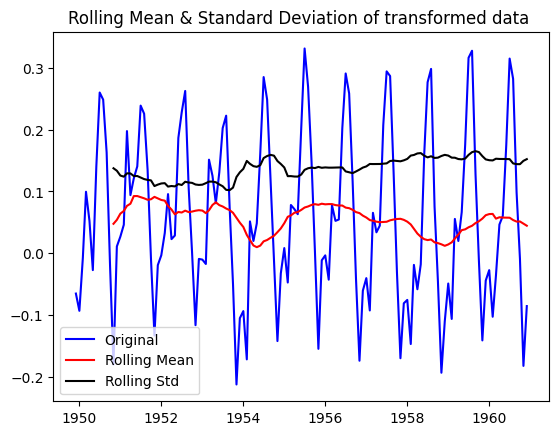

In [46]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()
plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation of transformed data ')

In [47]:
result = adfuller(new_data['#Passengers'])

In [48]:
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -3.162907991300869
n_lags: 13
p-value: 0.022234630001243157
Critial Values:
   1%, -3.4865346059036564
Critial Values:
   5%, -2.8861509858476264
Critial Values:
   10%, -2.579896092790057


In [49]:
# my data is now stationary 

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
  
decompose_result = seasonal_decompose(new_data['#Passengers'].dropna())

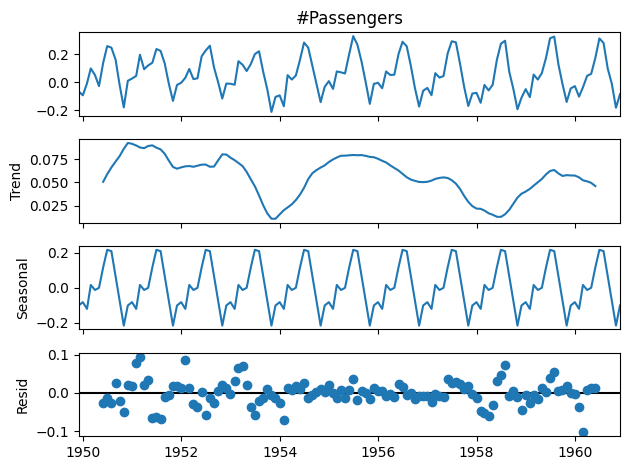

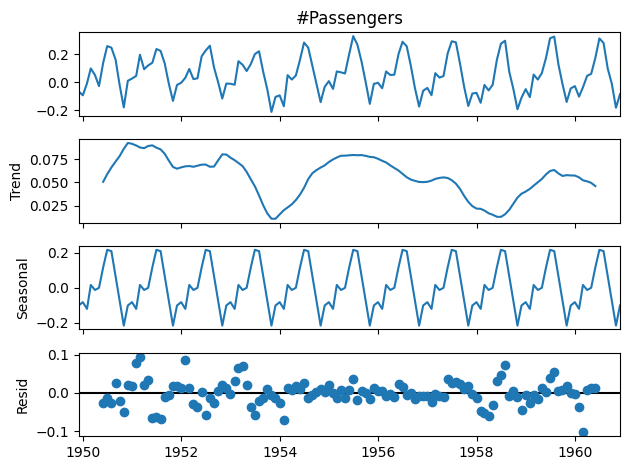

In [51]:
decompose_result.plot()

In [52]:
from statsmodels.tsa.stattools import acf, pacf

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

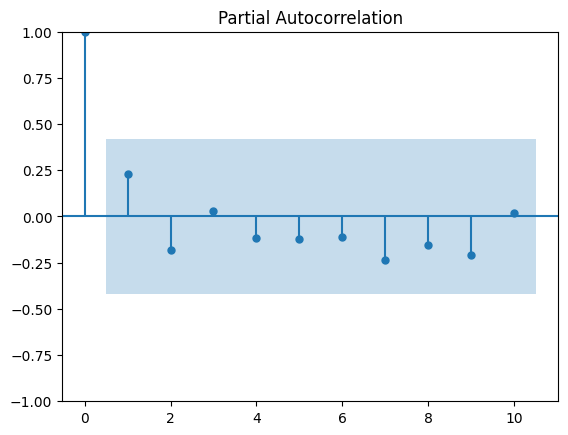

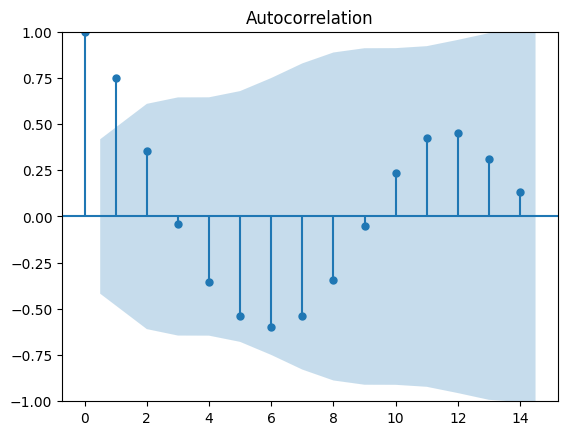

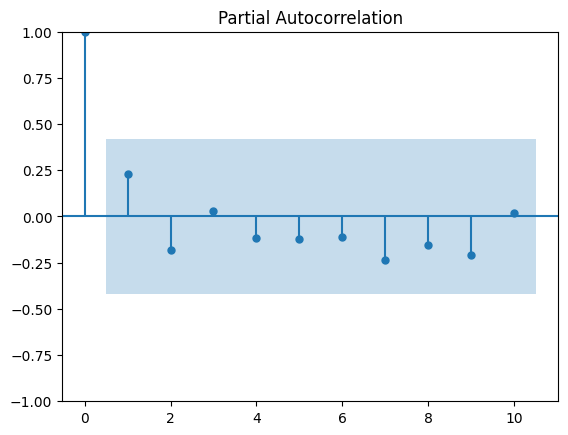

In [66]:
acf_plot = acf(new_data)
pacf_plot = pacf(new_data)
plot_acf(acf_plot)
plot_pacf(pacf_plot, lags=10)

In [70]:
from statsmodels.tsa.arima.model import ARIMA


In [71]:
train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

In [72]:
model = ARIMA(train, order=(1,0,2))


C:\Users\girij\anaconda3\envs\time-series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
model_fit = model.fit()

In [74]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 117.901
Date:                Sat, 06 Jul 2024   AIC                           -225.803
Time:                        22:21:49   BIC                           -211.865
Sample:                    12-01-1949   HQIC                          -220.143
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.022      2.446      0.014       0.011       0.097
ar.L1          0.4323      0.318      1.361      0.173      -0.190       1.055
ma.L1          0.5917      0.323      1.829      0.067      -0.042       1.226
ma.L2         -0.0778      0.279     -0.279      0.780      -0.625       0.469
sigma2         0.0081      0.002      4.769      0.000       0.005       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.02
Prob(Q):                              0.92   Prob(JB):                         0.05
Heteroskedasticity (H):               1.21   Skew:                            -0.08
Prob(H) (two-sided):                  0.55   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
new_data['predict'] = model_fit.predict(start = len(train), end = len(train) + len(test) -1 , dynamic=True)

<Axes: xlabel='Month'>

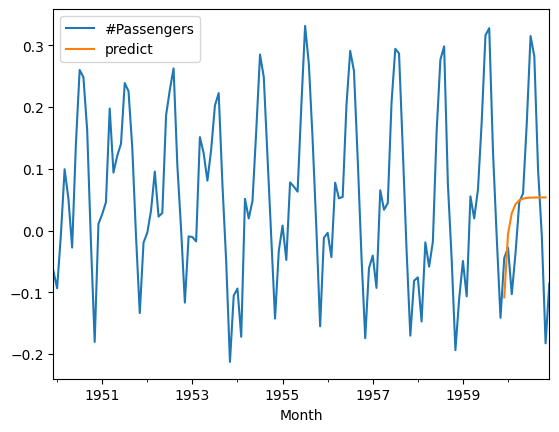

In [76]:
new_data[['#Passengers', 'predict']].plot()

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [78]:
model = SARIMAX(train, order= (1,0,2), seasonal_order = (1,0,2,12))
model = model.fit()

C:\Users\girij\anaconda3\envs\time-series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\girij\anaconda3\envs\time-series\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\girij\anaconda3\envs\time-series\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [79]:
new_data['predict'] = model.predict(start = len(train), end = len(train) + len(test) -1 , dynamic=True)

<Axes: xlabel='Month'>

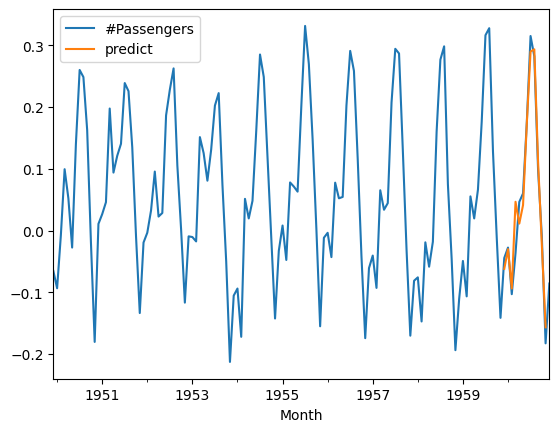

In [80]:
new_data[['#Passengers', 'predict']].plot()

In [81]:
firecast = model.forecast(steps=60)

<Axes: xlabel='Month'>

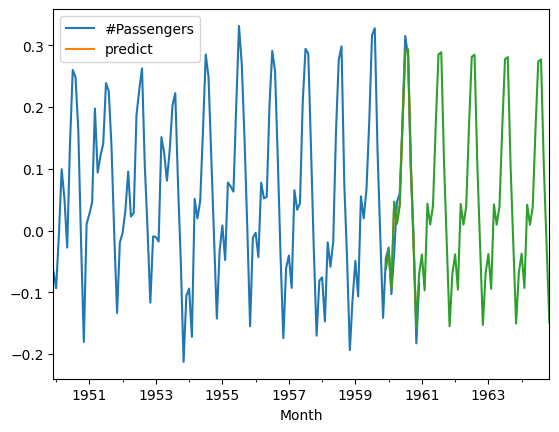

In [82]:
new_data.plot()
firecast.plot()